# Make Calibration WAV Files
## By Terry Bondy, VA3TYB

In [82]:
printf(strftime ("Last updated: %A %e %B %Y %Z", localtime (time())))

Last updated: Sunday 15 December 2019 UTC

In [83]:
%plot --format svg

In [84]:
# load "VA3TYB_A_s.mat"

In [85]:
# rows(VA3TYB_A_s)

In [89]:
period = 10;
sample_rate = 16000;
T = 0:1/sample_rate:period;

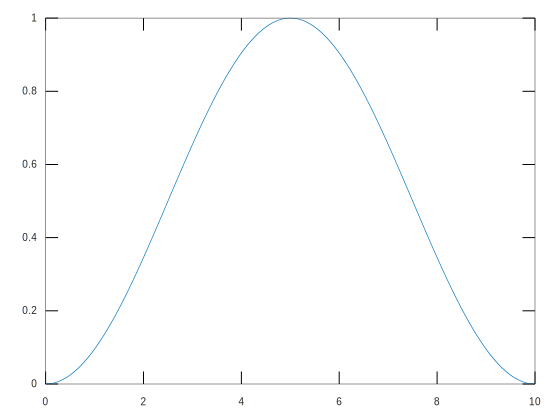

In [90]:
RC = (1 - cos(2*pi*T/period))/2;
plot(T, RC);

In [91]:
# Freq = 400:4:400+4*(rows(VA3TYB_A_s)-1);
fcLow = 200;
fcHigh = 2600;
fcLowP = fcLow/2;
fcHighP = fcHigh * 2;
freqInterval = fcHighP - fcLowP;
freqIntervals = freqInterval/(2*4);
Freq = fcLowP:freqInterval/freqIntervals:fcHighP;

In [92]:
cosArg = 2*pi*Freq';
tic = time();
Sig = arrayfun(@(t) sum(cos(cosArg*t)), T);
printf("toc: %d seconds", time() - tic)

toc: 5.1527 seconds

ans =  638


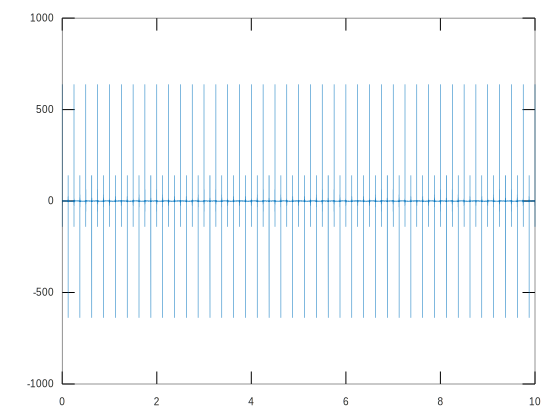

In [93]:
max(abs(Sig))
# A_s' * A_s
plot(T, Sig)

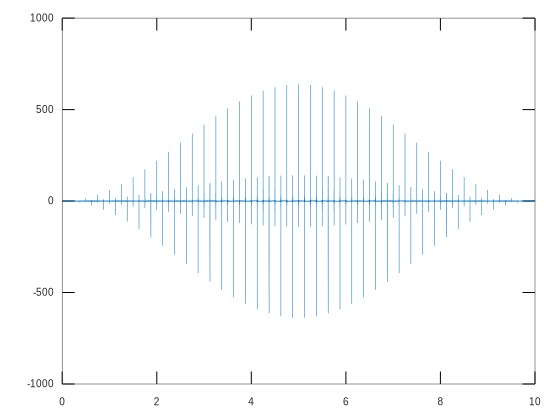

In [94]:
plot(T, RC .* Sig)

In [95]:
E_cos_pulse = fftshift(fft(RC .* Sig, sample_rate*period*10 + 1));
F_base = linspace(-sample_rate/2, sample_rate/2, columns(E_cos_pulse));

In [96]:
plot(F_base, E_cos_pulse)
grid on
grid minor
# axis([1000-0.1 1000+0.1], "tic")